Task 4.2 Supervised Learning - Classification 

In [6]:
# Importiere notwendige Bibliotheken
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [7]:
# 1. Lade das Dataset (diabetes.csv)
df = pd.read_csv("C:\\Users\\sonja\\Downloads\\diabetes.csv")


In [8]:
# 2. Zielvariable numerisch kodieren
df['class'] = df['class'].map({'tested_negative': 0, 'tested_positive': 1})



In [9]:
# 3. Features (X) und Zielvariable (y) definieren
X = df.drop('class', axis=1)
y = df['class']

In [10]:
# 4. Daten aufteilen in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:

# 5. Modell definieren und trainieren
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [12]:

# 6. Vorhersagen treffen
y_pred = model.predict(X_test)


In [13]:
# 7. Modellbewertung
print("=== Accuracy Score ===")
print(accuracy_score(y_test, y_pred))
print("\n=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))


=== Accuracy Score ===
0.7467532467532467

=== Confusion Matrix ===
[[78 21]
 [18 37]]

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [14]:

# 8. Modellparameter anzeigen
print("=== Modellkoeffizienten ===")
print(model.coef_)
print("=== Intercept ===")
print(model.intercept_)

=== Modellkoeffizienten ===
[[ 0.06439026  0.03409647 -0.01388056  0.00329364 -0.00180358  0.10259306
   0.62659359  0.03708443]]
=== Intercept ===
[-9.00605969]


In [15]:

# 9. Kreuzvalidierung
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("\n=== Cross-Validation Scores ===")
print(cv_scores)
print("Durchschnittliche Accuracy (CV):", np.mean(cv_scores))



=== Cross-Validation Scores ===
[0.77272727 0.74675325 0.75324675 0.81045752 0.77777778]
Durchschnittliche Accuracy (CV): 0.7721925133689839


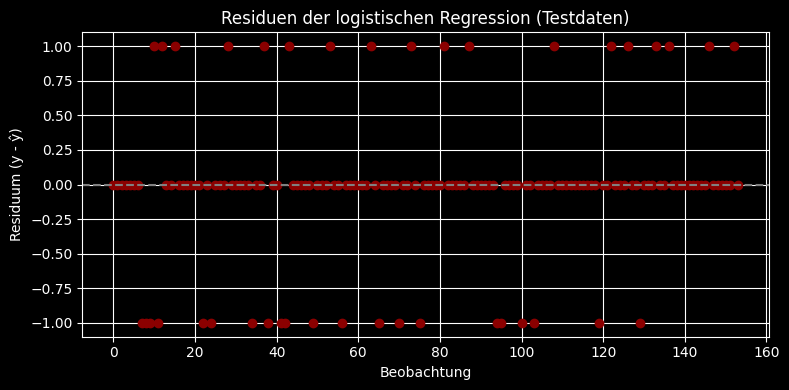

In [16]:

# 10. Residuen visualisieren
residuals = y_test - y_pred
plt.figure(figsize=(8, 4))
plt.plot(residuals.values, marker='o', linestyle='', color='darkred')
plt.axhline(0, color='gray', linestyle='--')
plt.title("Residuen der logistischen Regression (Testdaten)")
plt.xlabel("Beobachtung")
plt.ylabel("Residuum (y - ŷ)")
plt.grid(True)
plt.tight_layout()
plt.show()

# 6. Git-Update
# Diese Schritte müssen im Terminal ausgeführt werden:
# git add .
# git commit -m "Logistic Regression Model"
# git push